In [77]:
import pandas as pd
import pickle

In [78]:
%%time
may_scooters = pd.read_pickle('../data/may.pkl')
may_scooters.head()

Wall time: 6.81 s


,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,Bird
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,Bird
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,Bird
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,Bird
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,Bird


In [79]:
may_scooters.info() ##20292503 rows, 9 columns, note pubdatetime is an object and needs to be changed to datetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20283582 entries, 0 to 20292502
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.1+ GB


In [4]:
company_dict = {'Bird':'Bi', 'Lyft': 'Ly', 'Gotcha': 'G', 'Lime': 'Li', 'Spin': 'S', 'Jump': 'J', 'Bolt': 'Bo'}

In [5]:
may_scooters.companyname = may_scooters.companyname.replace(company_dict)##replaced company name with 2 letter name dictionary

In [6]:
may_scooters['year'] = may_scooters['pubdatetime'].dt.year

may_scooters['month'] = may_scooters['pubdatetime'].dt.month

may_scooters['day'] = may_scooters['pubdatetime'].dt.day

may_scooters['hour'] = may_scooters['pubdatetime'].dt.hour
may_scooters['min'] = may_scooters['pubdatetime'].dt.minute


In [80]:
may_scooters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20283582 entries, 0 to 20292502
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.1+ GB


In [81]:
may_scooters = may_scooters[['pubdatetime', 'year', 'month', 'day', 'hour', 'sumdid', 'latitude', 'longitude', 'chargelevel', 'companyname']] ##drops columns costpermin from dataframe

KeyError: "['year', 'month', 'day', 'hour'] not in index"

In [82]:
pd.set_option('display.max_columns', 15)##sets dataframe to view 15 columns

In [83]:
may_scooters.dropna(inplace=True) ##dropping all null rows

In [84]:
may_scooters.tail(10)

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
20292493,2019-05-31 23:58:27.243,36.122375,-86.775722,PoweredHICJ5XYHBAW5I,60.0,Lime
20292494,2019-05-31 23:58:27.243,36.121613,-86.775351,PoweredXZH7USFBU76DX,94.0,Lime
20292495,2019-05-31 23:58:27.243,36.120440,-86.777199,PoweredSZAWEG5FWAI6V,56.0,Lime
20292496,2019-05-31 23:58:27.243,36.121584,-86.775493,PoweredU6FP6ZXZ6JRTC,94.0,Lime
20292497,2019-05-31 23:58:43.000,36.147400,-86.811700,Poweredf0c59838-3392-5ea9-9a8f-d680bc8ac344,71.0,Jump
20292498,2019-05-31 23:59:42.000,36.163900,-86.782300,Poweredbb60ef04-c719-597f-805f-20978964fd8c,49.0,Jump
20292499,2019-05-31 23:59:42.000,36.160600,-86.776800,Powered9f5743ed-7f81-539b-9e37-6503d54445d3,68.0,Jump
20292500,2019-05-31 23:59:42.000,36.160600,-86.776900,Powered5744d1db-3bbe-55e5-9a23-a93828ba54fc,53.0,Jump
20292501,2019-05-31 23:59:42.000,36.162400,-86.774500,Poweredad1d6d3b-162a-5bec-bffd-cac4ac8dee1c,42.0,Jump
20292502,2019-05-31 23:59:42.000,36.151900,-86.798500,Powered8505008e-97c9-5003-8975-2ea6b2634fa0,76.0,Jump


In [85]:
may_scooters.info()
##Original info before drop of null rows, RangeIndex: 20292503 entries, 0 to 20292502, Data columns (total 9 columns):

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20283299 entries, 0 to 20292502
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.1+ GB


In [86]:
may_scooters.sumdid.unique()

array(['PoweredLIRL1', 'PoweredXWRWC', 'PoweredMEJEH', ...,
       'PoweredS26HB', 'PoweredWVFVTYLWIVLI7', 'Powered6Y1U7'],
      dtype=object)

In [87]:
may_scooters.sumdid.nunique() ##count the number of unique sumdid

8301

In [88]:
print(may_scooters['sumdid'].value_counts()) ##the count of each of the distinct values of a specific column
##https://datascienceparichay.com/article/pandas-count-of-unique-values-in-each-column/

PoweredIE7H5RIN474PE    8921
PoweredUK65LOU3K5N7G    8748
PoweredIOHG2G3XKATUL    8576
PoweredJCKMQCAL2SSNJ    8521
Powered4NYK5PWADVIAU    8439
                        ... 
PoweredGJYGPDVTFXRH7       1
PoweredYEBSU               1
PoweredCW742BQMJ3XHN       1
PoweredCI6VKIK2KOFMC       1
PoweredN4YI2A7RXZQLY       1
Name: sumdid, Length: 8301, dtype: int64


In [16]:
##7 SCOOTER COMPANIES, 8304 SCOOTERS, 

In [89]:
may_group=may_scooters.groupby(['companyname'])['sumdid'].nunique() ##NUMBER OF UNIQUE SCOOTER GROUPED BY COMPANY NAME

In [90]:
may_group=may_group.sort_values()
may_group

companyname
Gotcha     223
Bolt       346
Spin       685
Jump       976
Lyft      1376
Lime      1631
Bird      3064
Name: sumdid, dtype: int64

<AxesSubplot:title={'center':'Scooters by Company, May 2019'}, xlabel='companyname'>

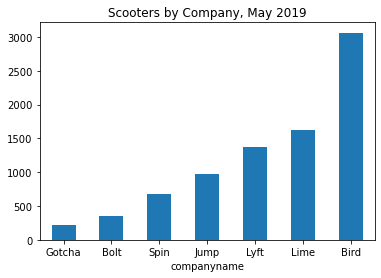

In [91]:
import matplotlib.pyplot as plt
may_group.plot.bar(x='companyname', y='sumdid', rot=0, title = 'Scooters by Company, May 2019')
##plt.show()

In [20]:
##import matplotlib.pyplot as plt
##import seaborn as sns
##%matplotlib inline      

In [21]:
#set the seaborn theme, style, color palette
#sns.set(style="ticks", color_codes=True)

#make a correlation plot that looks at each variables relationship with every other variable
#and plots the distribution of each variable along the diagonal
#sns.pairplot(may_scooters);

In [22]:
duplicate_rows = may_scooters[may_scooters.duplicated()]
## Select duplicate rows except first occurrence based on all columns
##duplicateRowsDF = dfObj[dfObj.duplicated()]
##print("Duplicate Rows except first occurrence based on all columns are :")
##print(duplicateRowsDF)

In [23]:
print("Duplicate Rows except first occurrence based on all columns are:")

Duplicate Rows except first occurrence based on all columns are:


In [24]:
print(duplicate_rows)

Empty DataFrame
Columns: [pubdatetime, year, month, day, hour, sumdid, latitude, longitude, chargelevel, companyname]
Index: []


In [25]:
##https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/

In [92]:
may_dead=may_scooters.loc[(may_scooters['chargelevel'] == 0.00)]

In [93]:
may_dead ##1025190 DEAD SCOOTERS/SCOOTERS WITH NO CHARGE/CHARGE LEVEL = 0

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
1077,2019-05-01 00:04:48.030,36.162910,-86.776332,Powered406,0.0,Gotcha
1084,2019-05-01 00:04:48.030,36.152102,-86.762997,Powered785,0.0,Gotcha
1093,2019-05-01 00:04:48.030,36.156370,-86.786350,Powered412,0.0,Gotcha
1095,2019-05-01 00:04:48.030,36.121324,-86.770482,Powered826,0.0,Gotcha
1096,2019-05-01 00:04:48.030,36.121522,-86.770209,Powered769,0.0,Gotcha
...,...,...,...,...,...,...
20291457,2019-05-31 23:58:00.927,36.153768,-86.783705,Powered1572748,0.0,Spin
20291578,2019-05-31 23:58:00.927,36.210910,-86.736240,Powered1590780,0.0,Spin
20291808,2019-05-31 23:58:27.210,36.133764,-86.791866,PoweredUK65LOU3K5N7G,0.0,Lime
20291887,2019-05-31 23:58:27.210,36.133778,-86.791849,PoweredKZQINR7YHPOLL,0.0,Lime


In [95]:
may_dead_company = may_dead.value_counts(['companyname'])##NUMBER OF DEAD SCOOTERS BY COMPANY
may_dead_company 

companyname
Jump           769269
Gotcha         193698
Spin            39098
Lime            21465
Bolt             1660
dtype: int64

In [105]:
may_dead=may_scooters.loc[(may_scooters['chargelevel'] == 0.00)]['sumdid'].nunique()
may_dead

1236

In [107]:
may_dead=may_dead.value_counts(['companyname']).nunique() ##THE NUMBER OF COMPANIES WITH DEAD SCOOTERS
may_dead

AttributeError: 'int' object has no attribute 'value_counts'

In [108]:
import matplotlib.pyplot as plt
may_dead.plot.bar(x='companyname', y='sumdid', rot=0, title = 'Zero Charge Scooters by Company, May 2019')
plt.show()



AttributeError: 'int' object has no attribute 'plot'

In [31]:
##may_dead.to_csv (r'C:\Users\jojuk\Documents\git\projects\nashville-scooters-scooter-snatchers\export_MayDead.csv', index = False)

AttributeError: 'int' object has no attribute 'to_csv'

In [ ]:
##Powered406=may_dead.loc[(may_dead['sumdid']=='Powered406')]
##Powered406

In [ ]:
# Select all duplicate rows based on multiple column names in list
#duplicate_location = Powered406[Powered406.duplicated(['latitude', 'longitude'])]

In [ ]:
##duplicate_location in Powered406 there are 868 rows. when looking at duplicate locations for Powered406 662 rows

In [ ]:
grouped_multiple=may_scooters.groupby(['latitude', 'longitude'])['sumdid'].nunique()

In [ ]:
grouped_multiple

In [ ]:
grouped_multiple.value_counts()

##may_scooters=grouped_multiple.dropna(['latitude', 'longitude']==0.000000)
##may_scooters

In [32]:
may_scooters['chargelevel'].mean()

65.90530320388221

In [33]:
may_scooters.describe(include='O')

,sumdid
count,20283299
unique,8301
top,PoweredIE7H5RIN474PE
freq,8921


In [34]:
top=may_scooters.loc[(may_scooters['sumdid'] == 'PoweredIE7H5RIN474PE')]
##top=may_scooters['sumdid']=='PoweredIE7H5RIN474PE'
top

,pubdatetime,year,month,day,hour,sumdid,latitude,longitude,chargelevel,companyname
1365,2019-05-01 00:04:56.910,2019,5,1,0,PoweredIE7H5RIN474PE,36.150001,-86.761955,91.0,3
3607,2019-05-01 00:09:56.970,2019,5,1,0,PoweredIE7H5RIN474PE,36.150001,-86.761955,91.0,3
5783,2019-05-01 00:14:58.037,2019,5,1,0,PoweredIE7H5RIN474PE,36.150001,-86.761955,91.0,3
7982,2019-05-01 00:19:57.383,2019,5,1,0,PoweredIE7H5RIN474PE,36.149929,-86.761890,91.0,3
10158,2019-05-01 00:24:57.743,2019,5,1,0,PoweredIE7H5RIN474PE,36.149929,-86.761890,91.0,3
...,...,...,...,...,...,...,...,...,...,...
20277855,2019-05-31 23:38:26.567,2019,5,31,23,PoweredIE7H5RIN474PE,36.150014,-86.761922,5.0,3
20281419,2019-05-31 23:43:26.623,2019,5,31,23,PoweredIE7H5RIN474PE,36.150014,-86.761922,5.0,3
20284877,2019-05-31 23:48:26.857,2019,5,31,23,PoweredIE7H5RIN474PE,36.150009,-86.761919,5.0,3
20288303,2019-05-31 23:53:27.153,2019,5,31,23,PoweredIE7H5RIN474PE,36.150009,-86.761919,5.0,3


In [35]:
may_location=may_scooters.groupby(['latitude'])['longitude'].max()
may_location

latitude
0.000000      0.000000
32.789116   -79.940267
32.828031   -79.954386
32.859748   -79.992988
33.315812   -80.544998
               ...    
36.616620   -87.284660
36.616640   -87.284570
36.616650   -87.284660
36.616670   -87.284640
36.616700   -87.284640
Name: longitude, Length: 105691, dtype: float64

In [39]:
may_scooters['chargelevel'].median()

72.0

In [41]:
may_scooters.median()

C:\Users\jojuk\AppData\Local\Temp/ipykernel_12820/1745667394.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  may_scooters.median()
C:\Users\jojuk\AppData\Local\Temp/ipykernel_12820/1745667394.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  may_scooters.median()


year           2019.000000
month             5.000000
day              20.000000
hour             13.000000
latitude         36.154105
longitude       -86.780900
chargelevel      72.000000
companyname       3.000000
dtype: float64

In [43]:
may_scooters.describe()

,year,month,day,hour,latitude,longitude,chargelevel,companyname
count,20283299.0,20283299.0,2.028330e+07,2.028330e+07,2.028330e+07,2.028330e+07,2.028330e+07,2.028330e+07
mean,2019.0,5.0,1.849900e+01,1.216913e+01,3.614047e+01,-8.675242e+01,6.590530e+01,2.442924e+00
std,0.0,0.0,9.027137e+00,7.082390e+00,6.193962e-01,1.486421e+00,3.041610e+01,1.776816e+00
min,2019.0,5.0,1.000000e+00,0.000000e+00,0.000000e+00,-8.728604e+01,0.000000e+00,0.000000e+00
25%,2019.0,5.0,1.100000e+01,6.000000e+00,3.614305e+01,-8.679266e+01,4.700000e+01,1.000000e+00
50%,2019.0,5.0,2.000000e+01,1.300000e+01,3.615411e+01,-8.678090e+01,7.200000e+01,3.000000e+00
75%,2019.0,5.0,2.600000e+01,1.800000e+01,3.616320e+01,-8.677170e+01,9.300000e+01,3.000000e+00
max,2019.0,5.0,3.100000e+01,2.300000e+01,3.661670e+01,0.000000e+00,1.000000e+02,6.000000e+00


In [44]:
may_scooters['chargelevel'].count()

20283299

In [45]:
may_scooters['chargelevel'].value_counts(normalize=True)

100.00    1.165699e-01
0.00      5.054355e-02
98.00     2.252410e-02
99.00     2.057708e-02
96.00     1.965632e-02
              ...     
13.35     4.930164e-08
27.26     4.930164e-08
21.15     4.930164e-08
17.04     4.930164e-08
58.90     4.930164e-08
Name: chargelevel, Length: 885, dtype: float64

In [72]:
may_scooters.groupby(['companyname'])

In [73]:
company_grp=may_scooters.groupby(['companyname'])

In [74]:
company_grp.get_group(3)

,pubdatetime,year,month,day,hour,sumdid,latitude,longitude,chargelevel,companyname
1225,2019-05-01 00:04:56.883,2019,5,1,0,PoweredGEHJ5GBPV7NJ5,36.179623,-86.792091,29.0,3
1226,2019-05-01 00:04:56.883,2019,5,1,0,PoweredRZTJOC7AACAQV,36.179466,-86.838192,100.0,3
1227,2019-05-01 00:04:56.883,2019,5,1,0,PoweredKF47YZWLD3URV,36.190752,-86.755384,71.0,3
1228,2019-05-01 00:04:56.883,2019,5,1,0,PoweredZUQ6GPER5N4CR,36.227547,-86.733978,96.0,3
1229,2019-05-01 00:04:56.883,2019,5,1,0,Powered2ZA4GQSKRFQEO,36.179418,-86.798616,65.0,3
...,...,...,...,...,...,...,...,...,...,...
20292492,2019-05-31 23:58:27.243,2019,5,31,23,PoweredQOW23KD6JPIJZ,36.108510,-86.764921,58.0,3
20292493,2019-05-31 23:58:27.243,2019,5,31,23,PoweredHICJ5XYHBAW5I,36.122375,-86.775722,60.0,3
20292494,2019-05-31 23:58:27.243,2019,5,31,23,PoweredXZH7USFBU76DX,36.121613,-86.775351,94.0,3
20292495,2019-05-31 23:58:27.243,2019,5,31,23,PoweredSZAWEG5FWAI6V,36.120440,-86.777199,56.0,3


In [56]:
filt= may_scooters['companyname'] == 3
may_scooters.loc[filt]

,pubdatetime,year,month,day,hour,sumdid,latitude,longitude,chargelevel,companyname
1225,2019-05-01 00:04:56.883,2019,5,1,0,PoweredGEHJ5GBPV7NJ5,36.179623,-86.792091,29.0,3
1226,2019-05-01 00:04:56.883,2019,5,1,0,PoweredRZTJOC7AACAQV,36.179466,-86.838192,100.0,3
1227,2019-05-01 00:04:56.883,2019,5,1,0,PoweredKF47YZWLD3URV,36.190752,-86.755384,71.0,3
1228,2019-05-01 00:04:56.883,2019,5,1,0,PoweredZUQ6GPER5N4CR,36.227547,-86.733978,96.0,3
1229,2019-05-01 00:04:56.883,2019,5,1,0,Powered2ZA4GQSKRFQEO,36.179418,-86.798616,65.0,3
...,...,...,...,...,...,...,...,...,...,...
20292492,2019-05-31 23:58:27.243,2019,5,31,23,PoweredQOW23KD6JPIJZ,36.108510,-86.764921,58.0,3
20292493,2019-05-31 23:58:27.243,2019,5,31,23,PoweredHICJ5XYHBAW5I,36.122375,-86.775722,60.0,3
20292494,2019-05-31 23:58:27.243,2019,5,31,23,PoweredXZH7USFBU76DX,36.121613,-86.775351,94.0,3
20292495,2019-05-31 23:58:27.243,2019,5,31,23,PoweredSZAWEG5FWAI6V,36.120440,-86.777199,56.0,3


In [59]:
filt= may_scooters['companyname'] == 3
may_scooters.loc[filt]['sumdid'].value_counts()

PoweredIE7H5RIN474PE    8921
PoweredUK65LOU3K5N7G    8748
PoweredIOHG2G3XKATUL    8576
PoweredJCKMQCAL2SSNJ    8521
Powered4NYK5PWADVIAU    8439
                        ... 
PoweredIF7UIJXEPYHJU       2
PoweredCW742BQMJ3XHN       1
PoweredGJYGPDVTFXRH7       1
PoweredN4YI2A7RXZQLY       1
PoweredCI6VKIK2KOFMC       1
Name: sumdid, Length: 1631, dtype: int64

In [60]:
company_grp['sumdid'].value_counts()

companyname  sumdid                                      
0            PoweredLSWU7                                    3758
             Powered9KWG4                                    3624
             PoweredUYV13                                    3446
             Powered36EWB                                    3439
             PoweredRT6M7                                    3425
                                                             ... 
6            Powered-8056ec65-315b-450d-4c9e-afad1402b6cf     191
             Powered-0d6ecd4b-30bf-936c-b722-96ab9f6bfb5b     181
             Powered-1d664277-55a1-ec4a-f26e-662b56e0b441     160
             Powered-0cf6fb25-5afa-09e8-004a-aefd4e320266     130
             Powered-ff728c28-5239-68af-ddf3-6d1207b01196       5
Name: sumdid, Length: 8301, dtype: int64

In [62]:
company_grp['sumdid'].value_counts().loc[6]

sumdid
Powered-877e8356-8d3f-de39-499e-5e562c29bdf5    2299
Powered-8a086751-8528-1a41-482c-c0b43c247859    2276
Powered-2826ffdd-23e0-4499-1a6f-9a3ab7782cb1    2220
Powered-bae6a12e-3ef8-0f7a-97e4-264f170da5ee    2197
Powered-a28f9c36-f38c-e305-a35b-426a3aa5bd3f    2194
                                                ... 
Powered-8056ec65-315b-450d-4c9e-afad1402b6cf     191
Powered-0d6ecd4b-30bf-936c-b722-96ab9f6bfb5b     181
Powered-1d664277-55a1-ec4a-f26e-662b56e0b441     160
Powered-0cf6fb25-5afa-09e8-004a-aefd4e320266     130
Powered-ff728c28-5239-68af-ddf3-6d1207b01196       5
Name: sumdid, Length: 346, dtype: int64

In [70]:
company_grp['chargelevel'].agg(['median', 'mean']).loc[0]

median    79.000000
mean      75.929047
Name: 0, dtype: float64

In [71]:
filt= may_scooters['sumdid'] == ['PoweredLSWU7']
may_scooters.loc[filt]['companyname'].value_counts()

ValueError: ('Lengths must match to compare', (20283299,), (1,))

In [ ]:
##country_grp['column'].str.contains('column').sum()